In [1]:
# Package imports

import os
import numpy as np
import json
import torch
from torchvision import datasets as tv_dataset, models
from torchvision import transforms as tv_transforms
from torchvision.utils import make_grid
from torch.utils.data.sampler import SubsetRandomSampler
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch_helper as thelper
import plt_helper
import util_helper
import warnings
import train_model
warnings.filterwarnings('ignore')
colab_kernel = False

In [2]:
data_dir = "./assets/flower_data"
train_dir = os.path.join(data_dir, 'train/')
valid_dir = os.path.join(data_dir, 'valid/')

In [3]:
if colab_kernel:    
    google_drive_mount = '/content/drive/'
    drive.mount(google_drive_mount)  # https://colab.research.google.com/notebooks/io.ipynb#scrollTo=u22w3BFiOveA
    proj_dir = google_drive_mount + 'My Drive/colab/pytorch-challenge'

In [4]:
# Creating transforms
normalize = ([0.485, 0.456, 0.406],[0.229, 0.224, 0.225])
crop = 224
resize = 256

augment = [tv_transforms.RandomRotation(30), tv_transforms.RandomHorizontalFlip(),
           tv_transforms.CenterCrop(224), tv_transforms.RandomVerticalFlip()]

transforms = {}
transforms['validation'] = thelper.Transforms.validation(resize=resize, crop=crop, normalize=normalize)
transforms['train'] = thelper.Transforms.train(augment=augment, normalize=normalize)

In [ ]:
# Creating datasets
dataset = {}
dataset['train'] = thelper.Dataset.dataset(train_dir, transforms['train'])
dataset['validation'] = thelper.Dataset.dataset(valid_dir, transforms['validation'])

In [ ]:
# Creating dataloaders
data_loader = {}
data_loader['train'] = thelper.Loaders.loader(dataset['train'])
data_loader['validation'] = thelper.Loaders.loader(dataset['validation'])

In [ ]:
print(data_loader)

{'train': <torch.utils.data.dataloader.DataLoader object at 0x7f107042e860>, 'validation': <torch.utils.data.dataloader.DataLoader object at 0x7f107042efd0>}


In [ ]:
# Label mapping
with open('cat_to_name.json', 'r') as f:
    cat_to_name = json.load(f)
label_map=cat_to_name

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

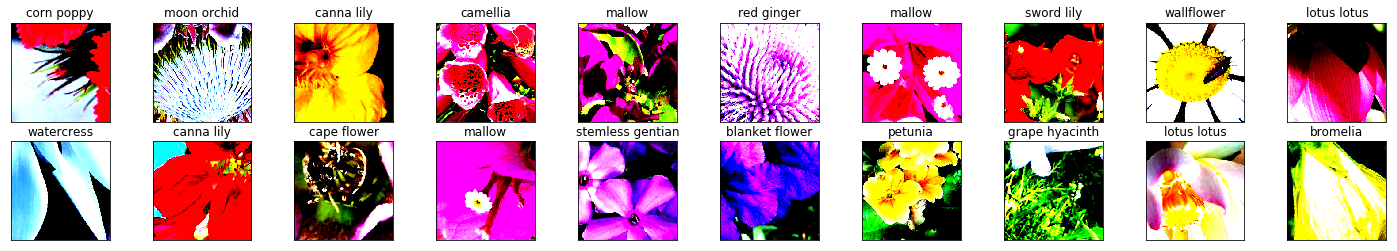

In [ ]:
# Get a batch of training data
images, labels = next(iter(data_loader['train']))

# Get some images from batch
# images, labels = util_helper.rnd_classes(batch_images, classes_batch_images, label_map, k=4)

images = images.numpy() # convert images to numpy for display
labels = labels.numpy()

# plot the images in the batch, along with the corresponding labels
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(20):
    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
    # plt.imshow(np.transpose(images[idx], (1, 2, 0)).astype(np.uint8))
    plt.imshow(np.transpose(images[idx], (1, 2, 0)))
    ax.set_title(label_map[str(labels[idx])])


# # Make a grid from batch
# grid = make_grid(images)

# # Plot grid
# plt_helper.image_show(grid, title = [label[1] for label in labels])

In [ ]:
# Create network
out_features = 102
# my_net = thelper.MyNet('resnet152', out_features=out_features)
my_net = thelper.MyNet('vgg16', out_features=out_features)

In [ ]:
# specify loss function (categorical cross-entropy)
criterion = nn.CrossEntropyLoss()

# specify optimizer (stochastic gradient descent) and learning rate = 0.001
optimizer = my_net.create_optmizer()

In [ ]:
# Unfreeze the classifief.parameters
for param in my_net.model.classifier.parameters():
    param.requires_grad = True

In [ ]:
# Create training object

# model, train_loader, validation_loader, criterion, optimizer, colab_kernel=False, epochs=3,
#              gpu_on=False, model_name = None):


train = train_model.TrainModel(my_net.model, data_loader['train'], data_loader['validation'], criterion, optimizer,   
                               model_name=my_net.trained_model )

In [ ]:
train.train()

epoch:  0 training_loss:  12.558419227600098
epoch:  0 training_loss:  24.009465217590332
epoch:  0 training_loss:  36.48254108428955
epoch:  0 training_loss:  46.98371124267578
epoch:  0 training_loss:  58.064839363098145
epoch:  0 training_loss:  67.49679851531982
epoch:  0 training_loss:  77.3788194656372
epoch:  0 training_loss:  87.63965320587158
epoch:  0 training_loss:  97.1420545578003
epoch:  0 training_loss:  106.41403293609619
epoch:  0 training_loss:  117.43274784088135
epoch:  0 training_loss:  126.7879409790039
epoch:  0 training_loss:  136.68040657043457
epoch:  0 training_loss:  146.81503772735596
epoch:  0 training_loss:  156.6245880126953
epoch:  0 training_loss:  165.99434852600098
epoch:  0 training_loss:  175.31113815307617
epoch:  0 training_loss:  184.9330415725708
epoch:  0 training_loss:  193.94857597351074
epoch:  0 training_loss:  203.23860549926758
epoch:  0 training_loss:  212.21501064300537
epoch:  0 training_loss:  220.7815399169922
epoch:  0 training_los